In [56]:
import seaborn as sns
import pandas as pd

infile = "../img/2023_streaming_coldStarts.pkl"
outfile = "../img/2023_streaming_coldStarts.pdf"
print("Setup done.")

Setup done.


In [57]:
sns.set_context("paper")
colors = sns.color_palette("Greys", 5)
sns.set_palette(colors)
sns.set_style("whitegrid")
print("sns initialized.")

sns initialized.


In [58]:
df_calls = pd.read_pickle(infile)
df_calls.head()

,Provider,function,kind,start,latency
0,google,registerUser,request,0,14.187894
1,google,registerDevice,request,0,87.973293
2,google,registerDevice,request,0,17.420433
3,google,registerUser,request,0,10.535028
4,google,registerDevice,request,0,17.148184


In [59]:
rename = [
    ["google","GCP"],
    ["aws","AWS"],
    ["azure","Azure"],
    ["request","Request"],
    ["coldstart","Cold Start"],
    ["patchUserMeta","updateUserMeta"],
]

for tuple in rename:
    print(f"old:{tuple[0]}, new:{tuple[1]}")
    df_calls.replace(to_replace=tuple[0],value=tuple[1],inplace=True)

df_calls.head()

old:google, new:GCP
old:aws, new:AWS
old:azure, new:Azure
old:request, new:Request
old:coldstart, new:Cold Start
old:patchUserMeta, new:updateUserMeta


,Provider,function,kind,start,latency
0,GCP,registerUser,Request,0,14.187894
1,GCP,registerDevice,Request,0,87.973293
2,GCP,registerDevice,Request,0,17.420433
3,GCP,registerUser,Request,0,10.535028
4,GCP,registerDevice,Request,0,17.148184


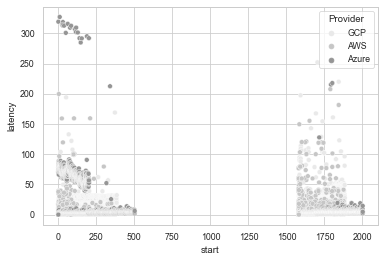

In [60]:
plot = sns.scatterplot(data=df_calls, x="start", y="latency", hue="Provider")

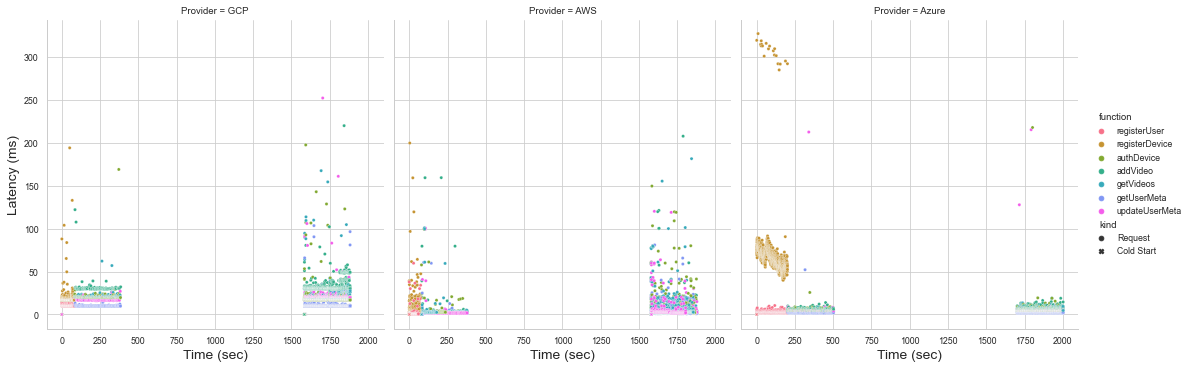

In [61]:

#markers = {'request': '.', 'coldstart':'X'}
#sizes = {'request': 5, 'coldstart':20}
#palette = {'request': "dimgrey", 'coldstart':"black"}
plot = sns.relplot(data=df_calls, x="start", y="latency", col="Provider", hue="function",
                   style="kind", s=10,
                   aspect=1)


plot.set_xlabels(label = "Time (sec)", fontsize="x-large")
plot.set_ylabels(label = "Latency (ms)", fontsize="x-large")

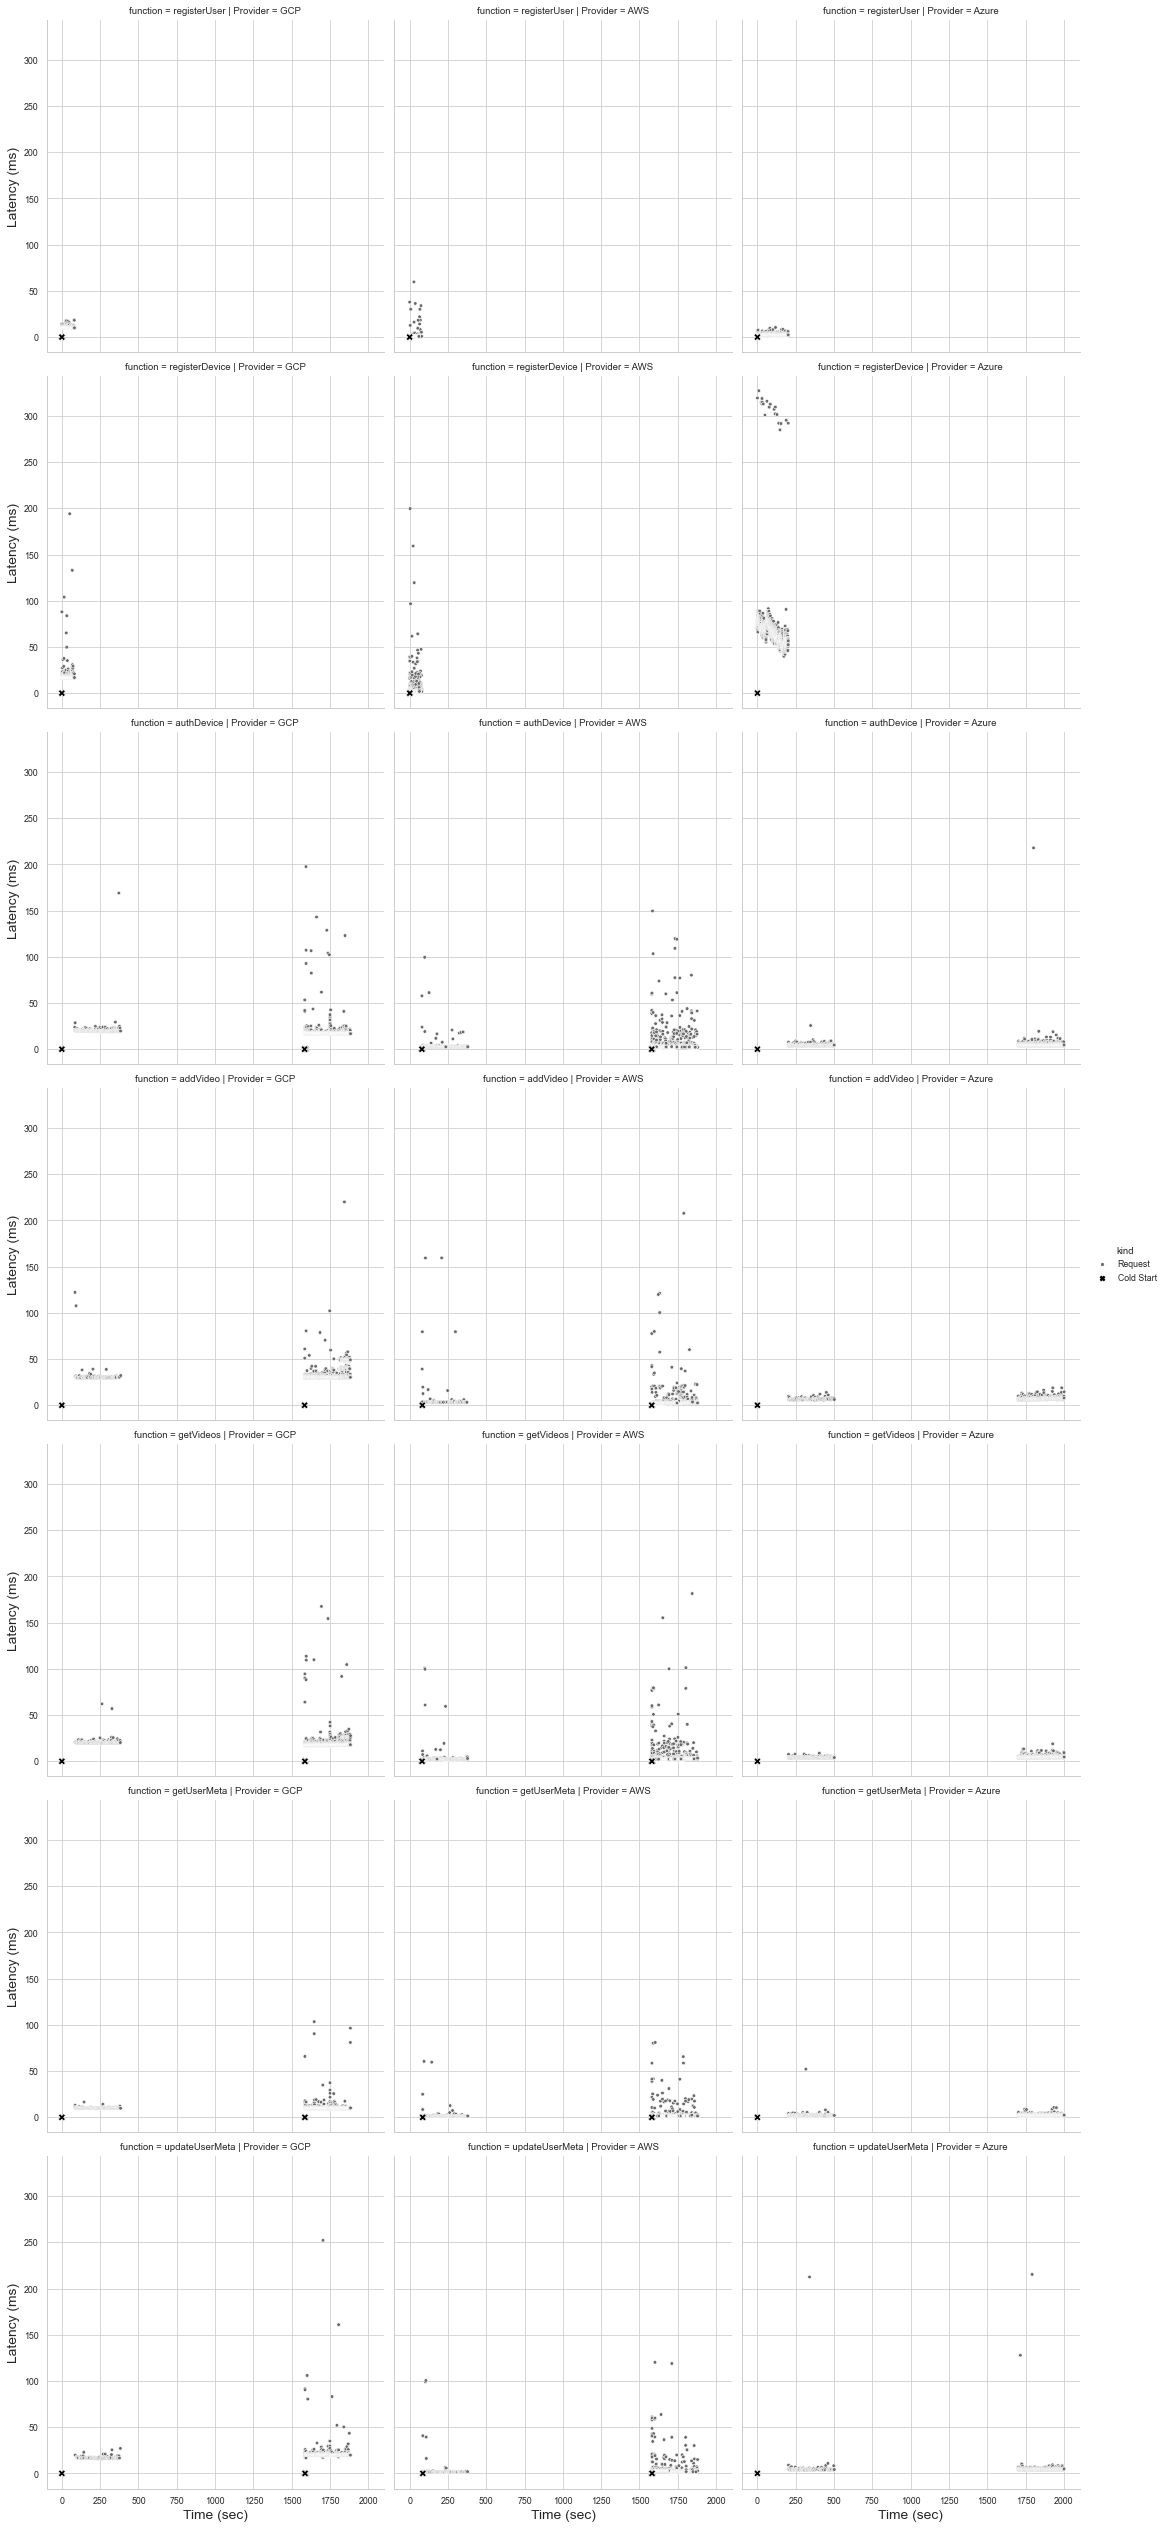

In [62]:

markers = {'Request': '.', 'Cold Start':'X'}
sizes = {'Request': 5, 'Cold Start':20}
palette = {'Request': "dimgrey", 'Cold Start':"black"}
plot = sns.relplot(data=df_calls, x="start", y="latency", col="Provider", row="function",
                   hue="kind", style="kind", palette=palette, markers=markers, s=50,
                   aspect=1)


plot.set_xlabels(label = "Time (sec)", fontsize="x-large")
plot.set_ylabels(label = "Latency (ms)", fontsize="x-large")
#plot.set_yticklabels(size = 12)
#plot.ax.set(yscale="log")
#plot.ax.set_yticks([0, 25, 50, 75, 100, 200, 1000])
#plot.set_yticklabels([0, 25, 50, 75, 100, 200, 1000], size = 12)
#plot.set(ylim=(0, 1000))
#plot.ax.legend(loc=0, fontsize="x-large")

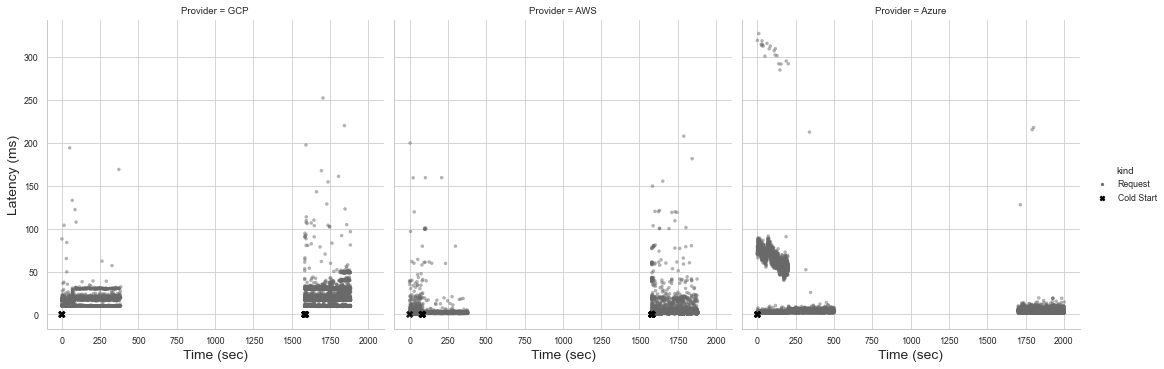

In [63]:
markers = {'Request': '.', 'Cold Start':'X'}
sizes = {'Request': 5, 'Cold Start':20}
palette = {'Request': "dimgrey", 'Cold Start':"black"}
plot = sns.relplot(data=df_calls, x="start", y="latency", col="Provider", hue="kind",
                   style="kind",  palette=palette, markers=markers, s=50, sizes=sizes,
                   edgecolor="none", alpha=0.5)


plot.set_xlabels(label = "Time (sec)", fontsize="x-large")
plot.set_ylabels(label = "Latency (ms)", fontsize="x-large")

In [64]:
filterData = []


#Provider function kind start latency
AWSStart = 2000
AzureStart = 2000
GCPStart = 2000

for index, row in df_calls.iterrows():
    if row['kind'] == "Request":
        if row['start'] > 1500:
            if row['Provider'] == "AWS" and row['start'] < AWSStart:
                AWSStart = row['start']
            if row['Provider'] == "Azure" and row['start'] < AzureStart:
                AzureStart = row['start']
            if row['Provider'] == "GCP" and row['start'] < GCPStart:
                GCPStart = row['start']

print("AWS Start is " + str(AWSStart))
print("Azure Start is " + str(AzureStart))
print("GCP Start is " + str(GCPStart))

for index, row in df_calls.iterrows():
    filter = {}
    if row['kind'] == "Request":
        if row['start'] > 1500:
            filter["Provider"] = row["Provider"]
            filter["function"] = row["function"]
            filter["latency"] = row["latency"]
            if row['Provider'] == "AWS":
                filter["start"] = row["start"] - AWSStart
            if row['Provider'] == "Azure":
                filter["start"] = row["start"] - AzureStart
            if row['Provider'] == "GCP":
                filter["start"] = row["start"] - GCPStart
            if filter["start"] < 30:
                filterData.append(filter)

df_filter = pd.DataFrame(filterData)

AWS Start is 1580
Azure Start is 1702
GCP Start is 1585


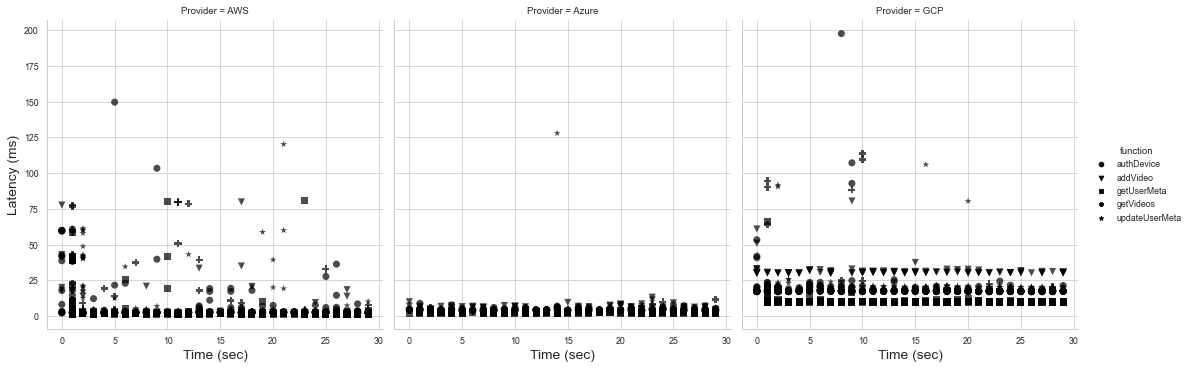

In [65]:
markers = {'authDevice': 'o', 'addVideo':'v', 'getUserMeta':'s', 'getVideos':'P', 'updateUserMeta':'*'}
sizes = {'Request': 5, 'Cold Start':20}
palette = {'authDevice': 'black', 'addVideo':'black', 'getUserMeta':'black', 'getVideos':'black', 'updateUserMeta':'black'}
plot = sns.relplot(data=df_filter, x="start", y="latency", col="Provider", hue="function", s=50,
                   style="function",  palette=palette, markers=markers,
                   edgecolor="none", alpha=0.7, col_order=["AWS", "Azure", "GCP"])


plot.set_xlabels(label = "Time (sec)", fontsize="x-large")
plot.set_ylabels(label = "Latency (ms)", fontsize="x-large")

plot.savefig(outfile)